<a href="https://colab.research.google.com/github/Sahithi530/Sahithi_INFO5731_Fall2024/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [6]:
# Install required libraries
!pip install pandas nltk gensim scikit-learn bertopic

# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
from google.colab import files

# Upload dataset
print("Upload your dataset (CSV file):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)
print("Dataset loaded successfully!")
print(df.head())

# Assume the dataset has a 'text' column containing clean text
if 'clean_text' not in df.columns:
    raise ValueError("The dataset must contain a 'text' column!")
# Define features directly using the 'clean_text' column
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
text_features = vectorizer.fit_transform(df['clean_text'])

# ----- LDA -----
print("\nPerforming LDA...")
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(text_features)

# Extract LDA topics
lda_topics = []
for idx, topic in enumerate(lda_model.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lda_topics.append(" ".join(top_words))

# ----- LSA -----
print("\nPerforming LSA...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_features)

# Extract LSA topics
lsa_topics = []
for idx, topic in enumerate(lsa_model.components_):
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lsa_topics.append(" ".join(top_words))

# ----- BERTopic -----
print("\nPerforming BERTopic...")
bertopic_model = BERTopic(language="english", calculate_probabilities=True)
bertopic_topics, _ = bertopic_model.fit_transform(df['clean_text'])

# Extract BERTopic topics
bertopic_results = bertopic_model.get_topic_info()
bertopic_topics = bertopic_results.head(10)[['Topic', 'Name']]

# ----- Save Topics to CSV -----
# Combine all topics into one DataFrame
lda_df = pd.DataFrame({'Model': 'LDA', 'Topic': [f"Topic {i+1}" for i in range(len(lda_topics))], 'Top Words': lda_topics})
lsa_df = pd.DataFrame({'Model': 'LSA', 'Topic': [f"Topic {i+1}" for i in range(len(lsa_topics))], 'Top Words': lsa_topics})
bertopic_df = pd.DataFrame({'Model': 'BERTopic', 'Topic': bertopic_topics['Topic'], 'Top Words': bertopic_topics['Name']})

# Create a final DataFrame with the clean text and topics
all_topics_df = pd.concat([lda_df, lsa_df, bertopic_df], ignore_index=True)
final_df = pd.concat([df[['clean_text']], all_topics_df], axis=1)

# Save to CSV
output_file = "topic_modeling_results.csv"
final_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}!")

# Provide a download link for the file
from google.colab import files
files.download(output_file)



Upload your dataset (CSV file):


Saving annotated_reviews_sentiment.csv to annotated_reviews_sentiment (4).csv
Dataset loaded successfully!
   document_id                                         clean_text sentiment
0            1  The soaring epicness of second part of the fil...  positive
1            2  This is just a replica of Star wars movie The ...  positive
2            3  I dont understand the obsession with hero entr...  positive
3            4  I didnt go in with big hopes but i was expecti...  positive
4            5  Its very tricky to do justice to a big story i...  positive

Performing LDA...

Performing LSA...

Performing BERTopic...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Results saved to topic_modeling_results.csv!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Upload your dataset (CSV file):


Saving annotated_reviews_sentiment.csv to annotated_reviews_sentiment (1).csv
Dataset loaded successfully!
   document_id                                         clean_text sentiment
0            1  The soaring epicness of second part of the fil...  positive
1            2  This is just a replica of Star wars movie The ...  positive
2            3  I dont understand the obsession with hero entr...  positive
3            4  I didnt go in with big hopes but i was expecti...  positive
4            5  Its very tricky to do justice to a big story i...  positive
Training Decision Tree Classifier...
Decision Tree Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Decision Tree):
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00        43
    positive       1.00      1.00      1.00       152

    accuracy                           1.00       200
 

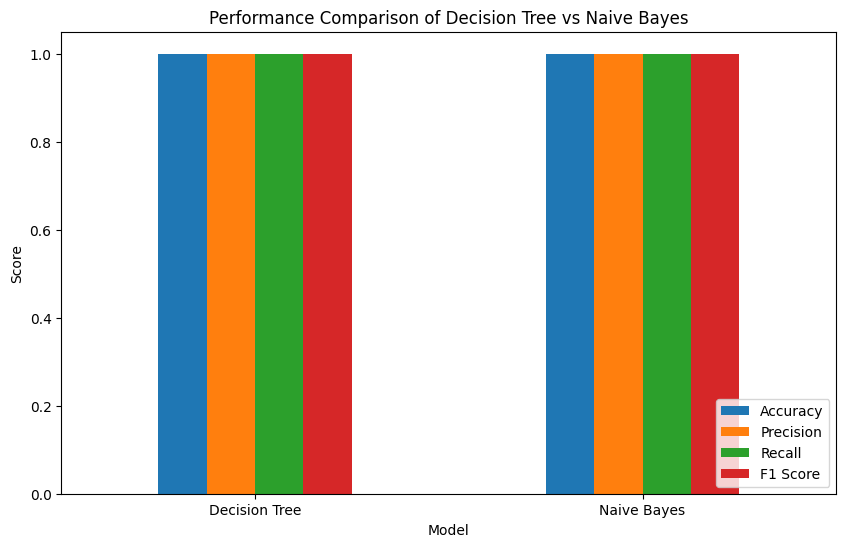

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload dataset
print("Upload your dataset (CSV file):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)
print("Dataset loaded successfully!")
print(df.head())

# Check if the required columns exist
if 'clean_text' not in df.columns or 'sentiment' not in df.columns:
    raise ValueError("Dataset must have 'clean_text' and 'sentiment' columns.")

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ----- Classifier 1: Decision Tree -----
print("Training Decision Tree Classifier...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)
y_pred_dt = dt_classifier.predict(X_test_tfidf)

# Evaluation Metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# ----- Classifier 2: Naive Bayes -----
print("\nTraining Naive Bayes Classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluation Metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Naive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# Compare Results
performance_df = pd.DataFrame({
    "Model": ["Decision Tree", "Naive Bayes"],
    "Accuracy": [dt_accuracy, nb_accuracy],
    "Precision": [dt_precision, nb_precision],
    "Recall": [dt_recall, nb_recall],
    "F1 Score": [dt_f1, nb_f1]
})

print("\nPerformance Comparison:\n", performance_df)

# Visualization of Metrics
performance_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Performance Comparison of Decision Tree vs Naive Bayes")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Please upload the training dataset file:


Saving train.csv to train (2).csv
Please upload the testing dataset file:


Saving test.csv to test (2).csv

--- Exploratory Data Analysis (EDA) ---

Shape of training data: (1460, 81)
Shape of testing data: (1459, 80)

Basic statistics of training data:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000

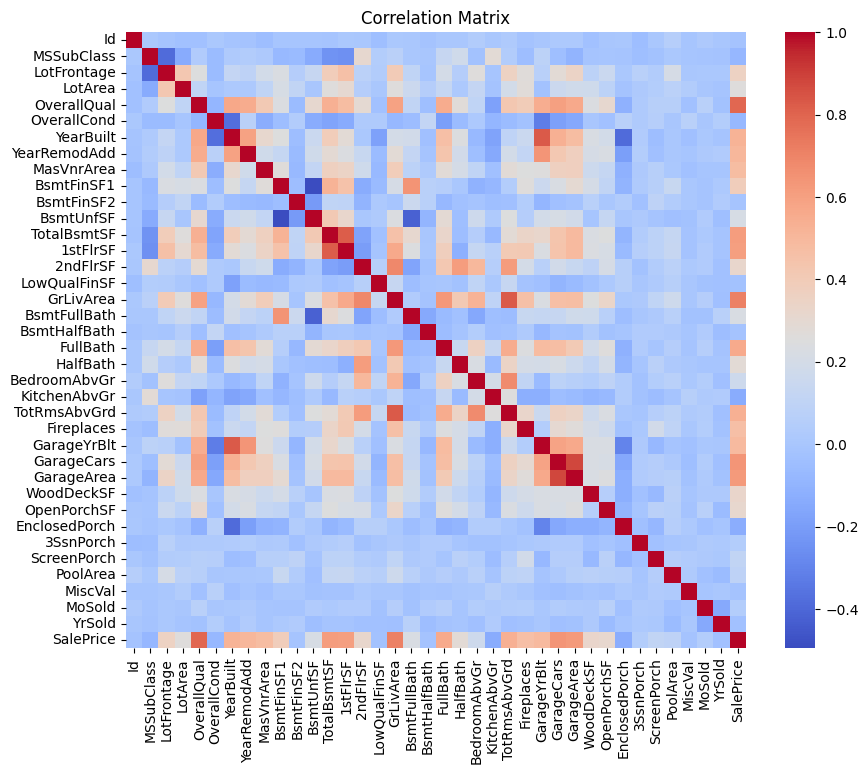

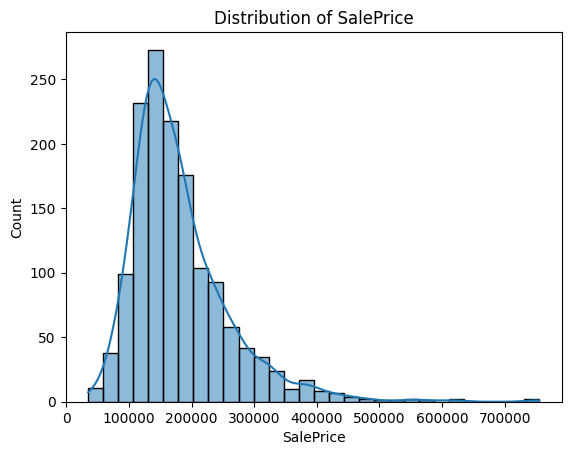


Selected Features:
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']


ValueError: A given column is not a column of the dataframe

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from google.colab import files

# Step 1: Load the dataset
print("Please upload the training dataset file:")
uploaded_train = files.upload()  # Upload training file
train_file = list(uploaded_train.keys())[0]  # Get the uploaded file name

print("Please upload the testing dataset file:")
uploaded_test = files.upload()  # Upload testing file
test_file = list(uploaded_test.keys())[0]  # Get the uploaded file name

# Load datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Step 2: Conduct Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis (EDA) ---\n")
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)
print("\nBasic statistics of training data:\n", train_data.describe())
print("\nMissing values in training data:\n", train_data.isnull().sum().sort_values(ascending=False).head(10))

# Step 2: Conduct Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis (EDA) ---\n")
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)
print("\nBasic statistics of training data:\n", train_data.describe())
print("\nMissing values in training data:\n", train_data.isnull().sum().sort_values(ascending=False).head(10))

# Visualize correlations (for numerical features)
# Select only numerical columns
numerical_cols = train_data.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = train_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of the target variable
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.show()


# Step 3: Data Cleaning and Feature Selection
# Drop columns with too many missing values
threshold = 0.4  # Keep columns with less than 40% missing values
train_data = train_data.loc[:, train_data.isnull().mean() < threshold]
test_data = test_data.loc[:, test_data.columns.isin(train_data.columns)]

# Remove 'Id' column as it's not a useful feature for the model
train_data = train_data.drop(columns=['Id'])
test_data = test_data.drop(columns=['Id'])

# Fill remaining missing values
numerical_cols = train_data.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = train_data.select_dtypes(include=["object"]).columns

# Select features based on correlation with the target variable
correlation_threshold = 0.4  # Select features highly correlated with SalePrice
correlated_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
selected_features = correlated_features[correlated_features > correlation_threshold].index.tolist()

# Keep only the selected features and target
selected_features.remove('SalePrice')  # Exclude the target itself
train_data = train_data[selected_features + ['SalePrice']]
test_data = test_data[selected_features]

print("\nSelected Features:\n", selected_features)

# Step 4: Split Data into Training and Testing Sets
X = train_data[selected_features]
y = train_data['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Preprocess Data (Scaling and Encoding)
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Step 6: Build and Train Regression Model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Step 7: Evaluate Model Performance on Validation Data
y_valid_preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_valid_preds)
mse = mean_squared_error(y_valid, y_valid_preds)
r2 = r2_score(y_valid, y_valid_preds)

print("\n--- Model Performance on Validation Data ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 8: Predict on the Test Data
y_test_preds = model.predict(test_data)

# Save predictions to a CSV file
output = pd.DataFrame({"Id": test_data["Id"], "SalePrice": y_test_preds})
output_file = "submission.csv"
output.to_csv(output_file, index=False)
print("\nPredictions saved to 'submission.csv'. Downloading the file...")

# Automatically download the CSV file
files.download(output_file)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [18]:
!pip install openai==0.28


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4


In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ----- Step 1: Description of the PLM -----
"""
PLM Description:
The selected model is `nlptown/bert-base-multilingual-uncased-sentiment`, which is a pre-trained BERT model fine-tuned for multilingual sentiment analysis.

- **Pretraining Data Sources**:
  The base BERT model was pre-trained on a large corpus of text, including Wikipedia and BookCorpus. These sources cover a broad range of topics and linguistic styles.

- **Number of Parameters**:
  The `bert-base` model has approximately 110 million parameters.

- **Task-Specific Fine-Tuning**:
  The `nlptown/bert-base-multilingual-uncased-sentiment` model has been fine-tuned specifically for sentiment analysis on a multilingual dataset, where it predicts sentiment scores ranging from 0 (Very Negative) to 4 (Very Positive).
"""

# ----- Step 2: Load the pre-trained model and tokenizer -----
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"  # Pre-trained BERT for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# ----- Step 3: Define the function for sentiment analysis -----
def bert_sentiment_analysis(text):
    """
    Perform sentiment analysis using the pre-trained BERT model.
    """
    # Tokenize input text and prepare inputs for the model
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()  # Get sentiment prediction (0-4)
    return sentiment

# ----- Step 4: Load your dataset -----
data = pd.read_csv("annotated_reviews_sentiment.csv")  # Replace with your actual dataset file name
print("Dataset loaded successfully!")

# ----- Step 5: Perform sentiment analysis -----
data['predicted_sentiment'] = data['clean_text'].apply(bert_sentiment_analysis)

# Map sentiment class index to human-readable labels (Optional)
sentiment_mapping = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}
data['predicted_sentiment_label'] = data['predicted_sentiment'].map(sentiment_mapping)

# ----- Step 6: Evaluate Performance -----
# Map ground truth labels to integers (if necessary)
label_mapping = {"Very Negative": 0, "Negative": 1, "Neutral": 2, "Positive": 3, "Very Positive": 4}
data['true_sentiment'] = data['sentiment'].map(label_mapping)

# Extract ground truths and predictions
y_true = data['true_sentiment']
y_pred = data['predicted_sentiment']

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ----- Step 7: Save Results -----
data.to_csv("bert_sentiment_analysis_results.csv", index=False)
print("Results saved to 'bert_sentiment_analysis_results.csv'.")


Dataset loaded successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.